Aby wygenerować wykresy do raportu należy odpalić program przy pomocy komendy "julia program.jl"

In [14]:
include("./program.jl")

Wyniki naszych metod będziemy porównywyć do bibliotecznej liczby pi w juli

In [10]:
π

π = 3.1415926535897...

W przeciwieństwie do innych języków programowania, w juli liczba pi nie jest zaimplementowana jako liczba stała ale jako typ Irrational

In [15]:
typeof(pi)

Irrational{:π}

Dzięki temu, możemy otrzymać przybliżenie liczby pi dla dowolnej precyzji ustawianej przy pomocy SetPrecision()

In [15]:
setprecision(BigFloat, 420) do
    BigFloat(pi)
end

3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938444

Biblioteka BigFloat korzysta w tym celu z The GNU MPFR Library. Powyższe informację zostały zaczerpnięte z https://julialang.org/blog/2017/03/piday/

Plik program.jl jest podzielony na moduły odpawiadające każdej metodzie

Pierwsza taką metodą, jest Metoda archimedesa. Przybliżającą liczbę pi przy pomocy obwodów wielokątów wpisanych i opisanych na kole jednostkowym.

In [20]:
geometry3.calc(420)

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914568772573520300045732647795616648621009208842615425655133505857093248482626406101416974632723707125223264313402778902381122114371845404615733299385677732390614065641869027159529005714859731417034132913776098499146657646038263745891344763411696717009722161181325655828277951015532201960514374808141280650800498120592540275033134719024832856474701965588445495552725173492473785988754907594750516839420051223410644285202500273683649081287049053058114205629299686360956784350691816616218894622757497241728440929040265773091670166409150883708899281054153605724568407924278922595515374079823784619896094916271230222521151859397797934783773627680621445307146577949603709708557668502618363063419303939379029107257282929190090611981294843046460611845567242

Poniżej przedstawiony jest wykres liczby cyfr znaczących

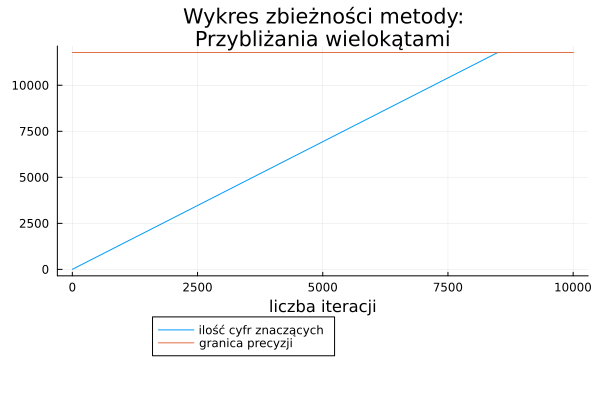

In [21]:
log_error_graph_gen(10000, geometry3.calc_steps, "Przybliżania wielokątami", "geo3", z)

Możemy eksperymentalnie sprawdzić czy ta metoda zbiega liniowo

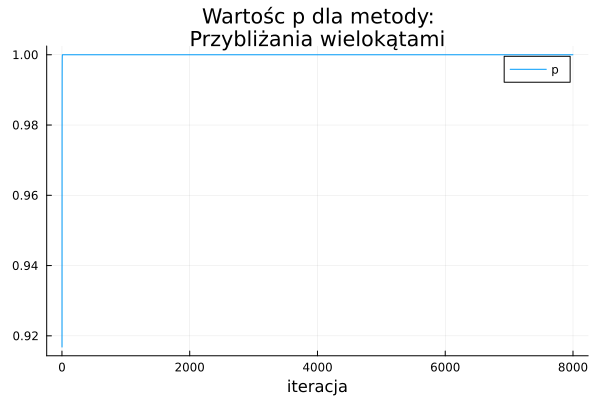

In [22]:
display_calculated_p(geometry3.calc_steps,8000,  "Przybliżania wielokątami", "geo3")

Kolejną metodą, był szereg taylora

In [23]:
taylor.calc(10)

3.23231580940559268732643345646441621673819816234676915791466875058206327556172757411147504026760992705265151085584522117029856967937463293500445203231580940559268732643345646441621673819816234676915791466875058206327556172757411147504026760992705265151085584522117029856967937463293500445203231580940559268732643345646441621673819816234676915791466875058206327556172757411147504026760992705265151085584522117029856967937463293500445203231580940559268732643345646441621673819816234676915791466875058206327556172757411147504026760992705265151085584522117029856967937463293500445203231580940559268732643345646441621673819816234676915791466875058206327556172757411147504026760992705265151085584522117029856967937463293500445203231580940559268732643345646441621673819816234676915791466875058206327556172757411147504026760992705265151085584522117029856967937463293500445203231580940559268732643345646441621673819816234676915791466875058206327556172757411147504026760992705265151085584522117029856967937463

Logarytmy z jego błędów względnych wyglądają następująco

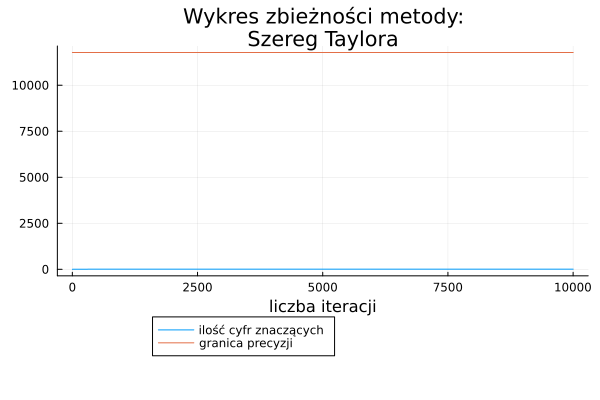

In [24]:
log_error_graph_gen(10000, taylor.calc_steps, "Szereg Taylora", "taylor", z)

Z wykresu widać że ta metoda zbiega o wiele wojniej

In [25]:
display_calculated_p(taylor.calc_steps,10000, 1, "Taylor'a", "taylor")

MethodError: MethodError: no method matching display_calculated_p(::typeof(Main.taylor.calc_steps), ::Int64, ::Int64, ::String, ::String)
Closest candidates are:
  display_calculated_p(::Any, ::Int64, !Matched::String, ::String) at ~/anal_num_prac/prac_1/prog/program.jl:363

Jako że iloraz błędów kolejnych wyrazów zbiega do 1 to ta metoda jest nadliniowa. Co potierdza że jest to najwolniejsza metoda

Kolejną metodą jest Monte Carlo. Analiza tej metody sprawia najwięcej problemów, bo to algorytm losowy

In [26]:
montecarlo.calc(30)

3.06666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666

Wykres logarytmów błędów względnych wygląda następująco

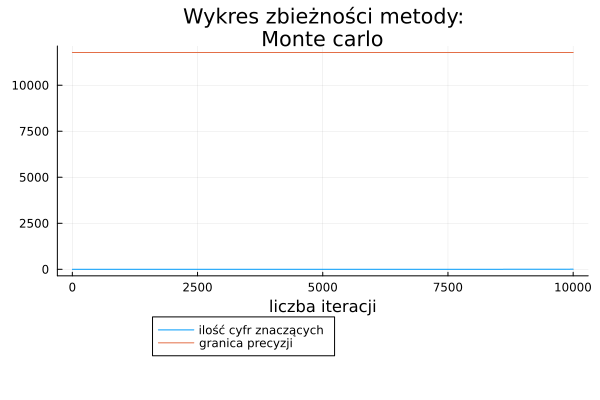

In [27]:
log_error_graph_gen(10000, montecarlo.calc_steps, "Monte carlo", "monte_carlo", z)

Na wykresie widać, że błąd niekoniecznie musi się zmniejszać lokalnie. W przeciwieńtwie do pozostałych metod.

I także dlatego kolejny wykres należy traktować raczej jako ciekawostkę

In [28]:
display_calculated_p(montecarlo.calc_steps, 1000, 1, "Monte carlo", "monte_carlo")

MethodError: MethodError: no method matching display_calculated_p(::typeof(Main.montecarlo.calc_steps), ::Int64, ::Int64, ::String, ::String)
Closest candidates are:
  display_calculated_p(::Any, ::Int64, !Matched::String, ::String) at ~/anal_num_prac/prac_1/prog/program.jl:363

Kolejna metoda oparta na osiągnięciach Viete'a, daje praktycznie takie same rezultaty co metoda archimedesa

In [29]:
log_error_graph_gen(10000, viete.calc_steps, "Algorytm Viete'a", "viete"), z

MethodError: MethodError: no method matching log_error_graph_gen(::Int64, ::typeof(Main.viete.calc_steps), ::String, ::String)
Closest candidates are:
  log_error_graph_gen(::Int64, ::Any, ::String, ::String, !Matched::BigFloat) at ~/anal_num_prac/prac_1/prog/program.jl:306

In [30]:
display_calculated_p(viete.calc_steps,8000, 1, "Viete'a", "viete")

MethodError: MethodError: no method matching display_calculated_p(::typeof(Main.viete.calc_steps), ::Int64, ::Int64, ::String, ::String)
Closest candidates are:
  display_calculated_p(::Any, ::Int64, !Matched::String, ::String) at ~/anal_num_prac/prac_1/prog/program.jl:363

Kolejny jest algorytm braci Chudnowsky'ich. Jest on najczęściej używany do bicia rekordów w wyznaczaniu liczby pi. Gdyż ma dobry kompromis, między używaną pamięcią a szybkością działania.

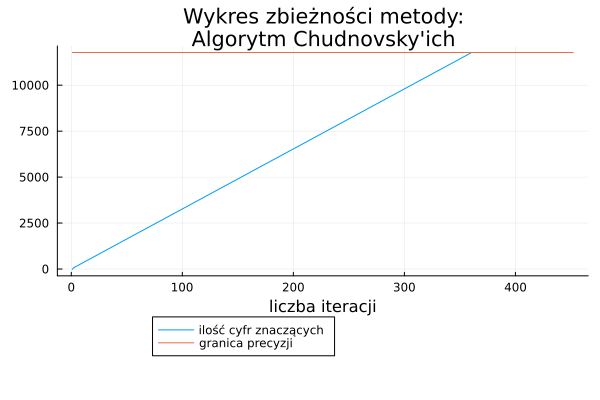

In [31]:
log_error_graph_gen(450, chudnowsky.calc_steps, "Algorytm Chudnovsky'ich", "chudnowsky", z)

Na wykresie jest anomalia, od 359 iteracji, znikają z niego wartości. Jest to spowodane tym że błąd bezwzględny od tej iteracji wynosi 0

In [32]:
abs_error(chudnowsky.calc(359),BigFloat(pi))

0.0

Analogicznie drugi wykres od pewnego miejsca nie ma wwartości

In [33]:
display_calculated_p(chudnowsky.calc_steps,500, 1, "Chudnovsky'ich", "chudnowsky")

MethodError: MethodError: no method matching display_calculated_p(::typeof(Main.chudnowsky.calc_steps), ::Int64, ::Int64, ::String, ::String)
Closest candidates are:
  display_calculated_p(::Any, ::Int64, !Matched::String, ::String) at ~/anal_num_prac/prac_1/prog/program.jl:363

Powyższe wyniki sugerują, że to właśnie ten algorytm jest wykorzystywany do wyznaczania liczby pi w juli

Na koniec został algorytm z najszybsza zbieżnością: Gaussa Legendra

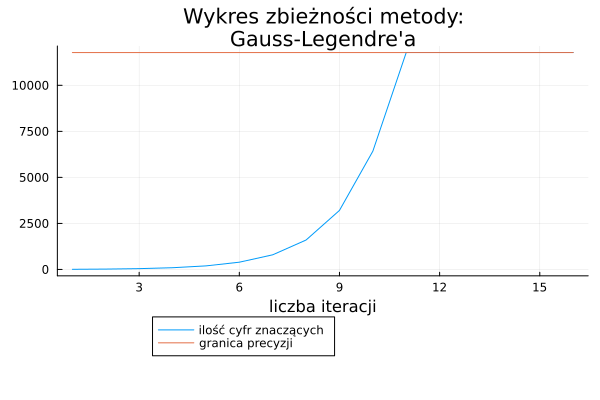

In [34]:
log_error_graph_gen(16, gauss_legendre.calc_steps, "Gauss-Legendre'a", "gauss_legendre", z)

In [35]:
display_calculated_p(gauss_legendre.calc_steps, 21, 2, "Gauss-Legendre'a", "gauss_legendre")

MethodError: MethodError: no method matching display_calculated_p(::typeof(Main.gauss_legendre.calc_steps), ::Int64, ::Int64, ::String, ::String)
Closest candidates are:
  display_calculated_p(::Any, ::Int64, !Matched::String, ::String) at ~/anal_num_prac/prac_1/prog/program.jl:363

In [36]:
gauss_legendre.calc(10)

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526356082778577134275778960917363717872146844090122495343014654958537105079227968925892354201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859502445945534690830264252230825334468503526193118817101000313783875288658753320838142061717766914730359825349042875546873115956286388235378759375195778185778053217122680661300192787661119590921642019